In [14]:
from random import randint
import time
import tracemalloc
import pandas as pd

class Graph:
    def __init__(self, vertices):
        self.V = vertices # количество вершин
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w]) # [вершина1, вершина2, вес/длина]

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    def basic_sort_graph(self):
        for i in range(self.V):
            for j in range(self.V-i-1):
                if self.graph[j][2] > self.graph[j + 1][2]:
                    self.graph[j], self.graph[j + 1] = self.graph[j + 1], self.graph[j]

        return None

    def optimized_sort_graph(self):
        self.graph = sorted(self.graph, key=lambda item: item[2])
        return None

    def kruskal(self, sorting):
        result = []
        i, e = 0, 0
        if sorting == 'basic':
            self.basic_sort_graph()
        else:
            self.optimized_sort_graph()
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)

        return result

    def generate_graph(self, n):
        self.V = n
        self.graph = []
        for u in range(self.V):
            for v in range(u+1, self.V):
                w = randint(1, 20)
                self.add_edge(u, v, w)

    def test(self, points, sorting):
        output = {'Number of edges': [],
                  'Time (s)': [],
                  'Used memory (MB)': [],
                  'Peak memory (MB)': []}

        for point in points:
            self.generate_graph(point)

            start = time.time()
            tracemalloc.start()

            result = self.kruskal(sorting=sorting)

            current, peak = tracemalloc.get_traced_memory()
            total = time.time() - start
            tracemalloc.stop()
            tracemalloc.clear_traces()

            output['Number of edges'].append(point)
            output['Time (s)'].append(total)
            output['Used memory (MB)'].append(current/1048576)
            output['Peak memory (MB)'].append(peak/1048576)

        return pd.DataFrame(output).set_index('Number of edges').round(3)

In [20]:
opt_g = Graph(0)
opt_perf = opt_g.test(points=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], sorting='optimized')
opt_perf

,Time (s),Used memory (MB),Peak memory (MB)
Number of edges,,,
100,0.003,0.046,0.111
200,0.007,0.169,0.448
300,0.017,0.368,1.008
400,0.034,0.643,1.797
500,0.041,0.995,2.807
600,0.067,1.425,4.040
700,0.086,1.926,5.499
800,0.118,2.509,7.133
900,0.131,3.178,9.095


In [21]:
basic_g = Graph(0)
basic_perf = basic_g.test(points=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], sorting='basic')
basic_perf

,Time (s),Used memory (MB),Peak memory (MB)
Number of edges,,,
100,0.004,0.009,0.011
200,0.016,0.017,0.020
300,0.033,0.025,0.030
400,0.081,0.034,0.040
500,0.098,0.067,0.075
600,0.158,0.053,0.064
700,0.244,0.063,0.075
800,0.350,0.071,0.084
900,0.473,0.081,0.096


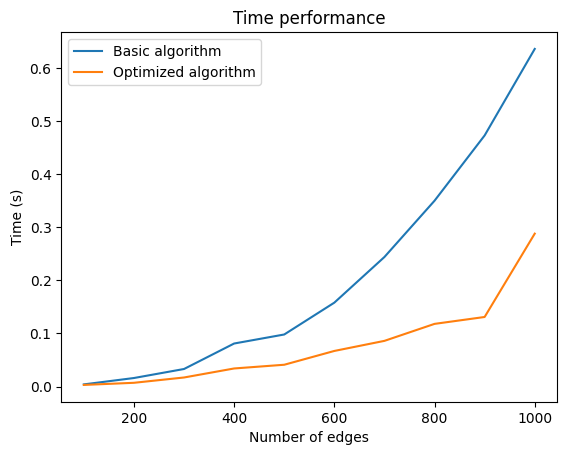

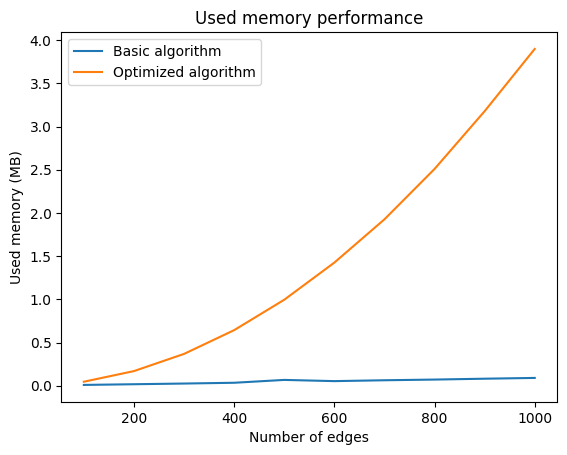

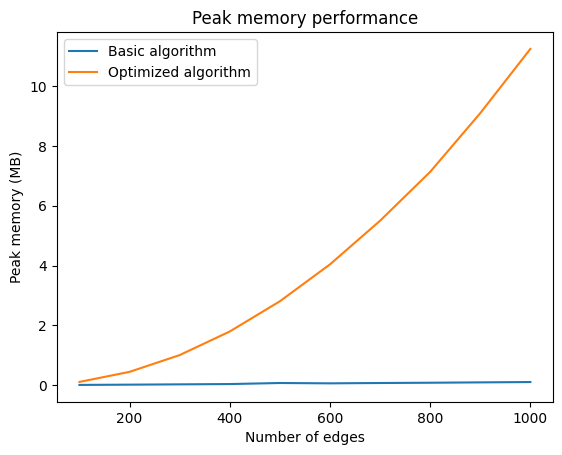

In [29]:
import matplotlib.pyplot as plt

plt.plot(basic_perf.index, basic_perf['Time (s)'])
plt.plot(opt_perf.index, opt_perf['Time (s)'])
plt.title('Time performance')
plt.ylabel('Time (s)')
plt.xlabel('Number of edges')
plt.legend(['Basic algorithm', 'Optimized algorithm'])
plt.show()

plt.plot(basic_perf.index, basic_perf['Used memory (MB)'])
plt.plot(opt_perf.index, opt_perf['Used memory (MB)'])
plt.title('Used memory performance')
plt.ylabel('Used memory (MB)')
plt.xlabel('Number of edges')
plt.legend(['Basic algorithm', 'Optimized algorithm'])
plt.show()

plt.plot(basic_perf.index, basic_perf['Peak memory (MB)'])
plt.plot(opt_perf.index, opt_perf['Peak memory (MB)'])
plt.title('Peak memory performance')
plt.ylabel('Peak memory (MB)')
plt.xlabel('Number of edges')
plt.legend(['Basic algorithm', 'Optimized algorithm'])
plt.show()